In [1]:
from __future__ import print_function

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '../py')
from graviti import *

In [3]:
import numpy as np
import scipy as sp
from scipy.sparse import coo_matrix
import scipy.ndimage as ndi

from skimage.draw import polygon
from skimage import io
from skimage.measure import label, regionprops
import skimage.io
import skimage.measure
import skimage.color

import glob
import pickle
import pandas as pd
import os
import timeit
import random

import pyvips

In [4]:
import timeit
import multiprocessing
from joblib import Parallel, delayed
from datetime import datetime
from tqdm import tqdm

In [5]:
import umap
import seaborn as sns; sns.set()

In [6]:
patches = glob.glob('/home/garner1/pipelines/nucleAI/data/TCGA-A2-A0CK-01Z-00-DX1/*.pkl')

In [15]:
reducer = umap.UMAP(n_components=2,min_dist=0,n_neighbors=10)
intensity_features = []
for patch in patches[:]:
    #print(patch)
    infile = open(patch,'rb')
    lista = pickle.load(infile)
    intensity_features.extend(lista)
    infile.close()

In [19]:
list_of_features = random.sample(intensity_features,1000)
pos = np.array([f[0] for f in list_of_features if f is not None])  
data_cov = np.array([np.real(sp.linalg.logm(np.cov(f[1],rowvar=False))).flatten() for f in list_of_features if f is not None])  
data_corrcoef = np.array([np.real(sp.linalg.logm(np.corrcoef(f[1],rowvar=False))).flatten() for f in list_of_features if f is not None])  

In [20]:
pos

array([[1136.85714286, 1784.53084416],
       [ 322.53456221, 3113.50691244],
       [2325.0794702 , 3739.63576159],
       ...,
       [2004.        , 1563.29761905],
       [1443.35897436, 1440.44551282],
       [ 890.48760331, 3751.7107438 ]])

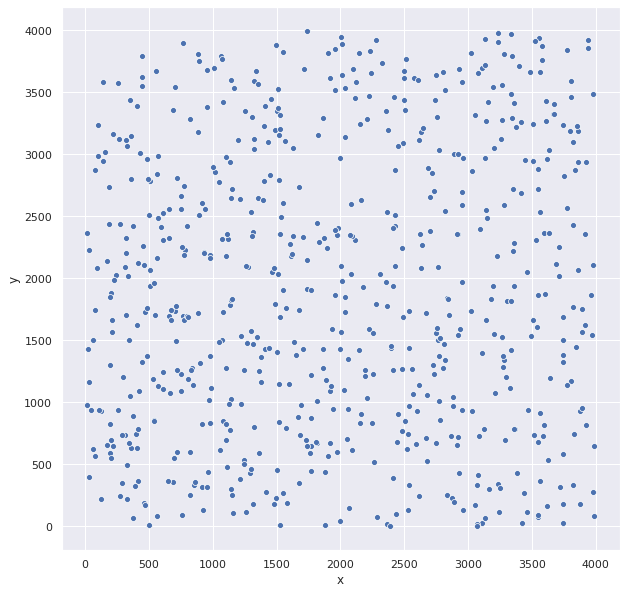

In [21]:
x = pos[:,0]
y = pos[:,1]
df_plot = pd.DataFrame(dict(x=x, y=y))

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(x="x", y="y", data=df_plot)

In [ ]:
embedding = reducer.fit_transform(data_cov)
x = embedding[:,0]
y = embedding[:,1]
df_plot = pd.DataFrame(dict(x=x, y=y))

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(x="x", y="y", data=df_plot)

In [ ]:
embedding = reducer.fit_transform(data_corrcoef)
x = embedding[:,0]
y = embedding[:,1]
df_plot = pd.DataFrame(dict(x=x, y=y))

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(x="x", y="y", data=df_plot)